<a href="https://colab.research.google.com/github/Memunoz/bases/blob/main/Trabajo_unlu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comienzo (tratamiento inicial)

Importo las librerias que voy a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

Cargo el data set que descargue de kaggle y cargue previamente a mi github

In [2]:
url = 'https://raw.githubusercontent.com/Memunoz/data_transformation/main/ds_salaries.csv'
df = pd.read_csv(url)

Revisamos el contenido

In [3]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
conteo_ubicaciones = df['company_location'].value_counts()

primeros_resultados = conteo_ubicaciones.head(20)

print(primeros_resultados)

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
PT      14
NL      13
MX      10
IE       7
SG       6
AT       6
JP       6
TR       5
CH       5
NG       5
Name: company_location, dtype: int64


In [5]:
data_counts = df.groupby('employee_residence').size().reset_index(name='count')

print(data_counts)

   employee_residence  count
0                  AE      3
1                  AM      1
2                  AR      6
3                  AS      2
4                  AT      6
..                ...    ...
73                 TR      5
74                 UA      4
75                 US   3004
76                 UZ      2
77                 VN      3

[78 rows x 2 columns]


In [6]:
df.shape

(3755, 11)

Aca es donde me doy cuenta que 3040 datos de los 3755 son pertenecientes a US y decido cambiar mi enfoque para centrarlo solo en US

In [7]:
df = df[df['company_location'] == 'US']

df.drop(df[df['company_location'] != 'US'].index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [8]:
df.shape

(3040, 11)

In [9]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Remplazo los valores abreviados para que sea mas comprensible con la info que saco del glosario del dataset, elimino duplicados, me aseguro de no tener datos nulos y elimino las columnas que no voy a necesitar

In [10]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'On-site', 0:'Remote', 50:'Hybrid'})

In [11]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape
df = df.drop_duplicates(keep='last')

In [12]:
df = df.drop(['salary_currency', 'salary','company_location','employee_residence'], axis=1)

In [13]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64

In [14]:
df.shape


(1929, 7)

Tengo 1929 datos unicos

In [15]:
df.describe()

,work_year,salary_in_usd
count,1929.000000,1929.000000
mean,2022.412131,152374.791602
std,0.664511,59786.145995
min,2020.000000,5679.000000
25%,2022.000000,110000.000000
50%,2022.000000,145885.000000
75%,2023.000000,187200.000000
max,2023.000000,450000.000000


# Empezamos a trabajar los datos

In [16]:
#@title Primero vemos como fueron los salarios a travez del tiempo
work_year_stats = df.groupby('work_year')['salary_in_usd'].describe().transpose()
work_year_stats = work_year_stats.round(2)
print(work_year_stats)

work_year       2020       2021       2022       2023
count          31.00      99.00     843.00     956.00
mean       141694.77  134566.75  147958.49  158459.54
std         96820.64   73632.12   55422.95   59717.62
min         45760.00    5679.00   12000.00   25500.00
25%         89000.00   86250.00  110000.00  115098.00
50%        106000.00  120000.00  144000.00  150000.00
75%        144175.00  170000.00  182080.00  198050.00
max        450000.00  423000.00  405000.00  385000.00


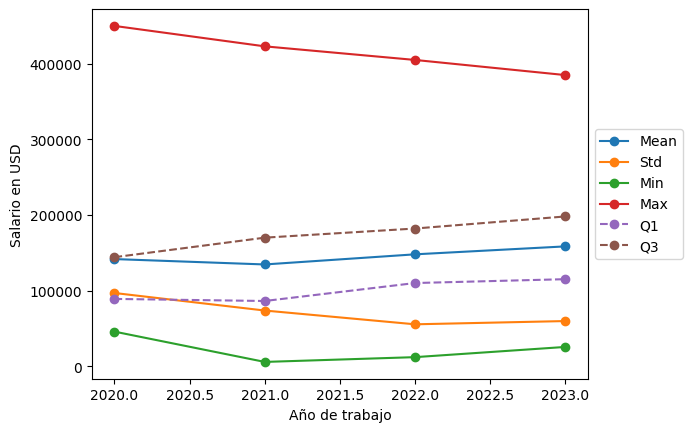

In [17]:
#@title Lo vemos en un grafico de linea
work_year_stats = df.groupby('work_year')['salary_in_usd'].describe().round(2)

work_year_values = work_year_stats.index
mean = work_year_stats['mean']
std = work_year_stats['std']
min_value = work_year_stats['min']
max_value = work_year_stats['max']
q1 = work_year_stats['25%']
q3 = work_year_stats['75%']

fig, ax = plt.subplots()

ax.plot(work_year_values, mean, label='Mean', marker='o')
ax.plot(work_year_values, std, label='Std', marker='o')
ax.plot(work_year_values, min_value, label='Min', marker='o')
ax.plot(work_year_values, max_value, label='Max', marker='o')
ax.plot(work_year_values, q1, '--', label='Q1', marker='o')
ax.plot(work_year_values, q3, '--', label='Q3', marker='o')

ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')
ax.tick_params(axis='y', left=True, right=False)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel('Año de trabajo')
ax.set_ylabel('Salario en USD')

plt.show()

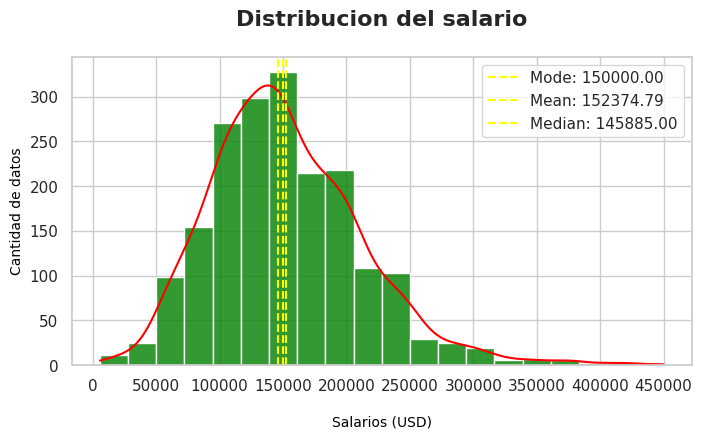

In [18]:
#@title Realizamos un histograma para tener un primer vistazo de los salarios
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.histplot(df['salary_in_usd'], alpha=0.8, color="green", bins=20, kde=True)

plt.xticks(range(0, 500000, 50000))
plt.title("Distribucion del salario\n", fontsize=16, fontweight="bold")
plt.xlabel('\nSalarios (USD)', color="black", fontsize=10)
plt.ylabel('Cantidad de datos', color="black", fontsize=10)
ax.lines[0].set_color('red')

mode = df['salary_in_usd'].mode().values[0]
mean = df['salary_in_usd'].mean()
median = df['salary_in_usd'].median()

plt.axvline(x=mode, color='yellow', linestyle='--', label=f'Mode: {mode:.2f}')
plt.axvline(x=mean, color='yellow', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(x=median, color='yellow', linestyle='--', label=f'Median: {median:.2f}')

plt.legend()
plt.show()

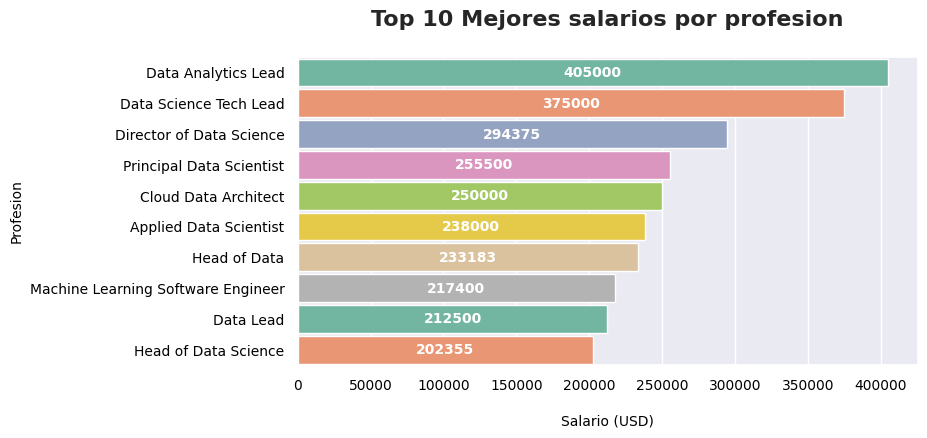

In [19]:
#@title Revisamos en un grafico de barras las profesiones con mejor salario
top_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
plt.figure(figsize=(8, 4))
sns.set(style="darkgrid")
ax = sns.barplot(y=top_salary.index, x='salary_in_usd', data=top_salary,
                 palette="Set2", width=0.9)
plt.title('Top 10 Mejores salarios por profesion\n', fontsize=16, fontweight="bold", loc="center")
plt.xlabel('\nSalario (USD)', color="black", fontsize=10)
plt.ylabel('Profesion', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")
for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")
plt.show()

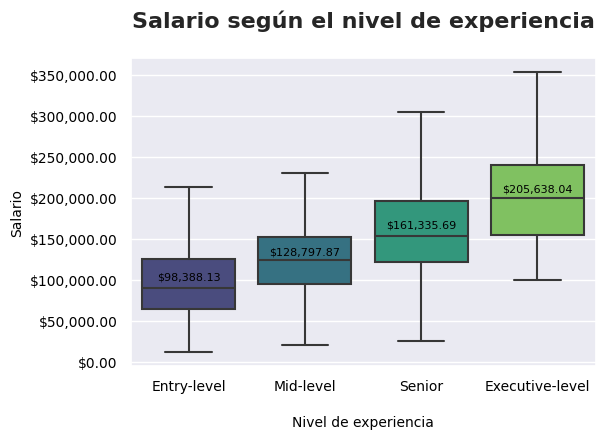

In [20]:
#@title Comparamos con un boxplot los rangos de salario segun nivel de experiencia
plt.figure(figsize=(6, 4))
median_salary = df.groupby('experience_level')['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd')
ax = sns.boxplot(data=df, x='experience_level', y='salary_in_usd',
                 order=median_salary['experience_level'],
                 palette="viridis", showfliers=False)

ax.set_yticklabels(['${:,.2f}'.format(round(x, 2)) for x in ax.get_yticks()])

for i in range(len(median_salary)):
    level = median_salary['experience_level'].iloc[i]
    salary = median_salary['salary_in_usd'].iloc[i]
    ax.text(i, salary, '${:,.2f}'.format(round(salary, 2)), ha='center', va='bottom', color='black', fontsize=8)

plt.title("Salario según el nivel de experiencia\n", fontsize=16, fontweight="bold", loc="center")
plt.xlabel("\nNivel de experiencia", color="black", fontsize=10)
plt.ylabel("Salario", color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")
plt.show()

In [21]:
#@title Comparamos en un grafico de burbuja los salarios por tipo de contrato
job_type_stats = df.groupby('employment_type')['salary_in_usd'].agg(['min', 'mean', 'max']).round(0)

fig = px.scatter(job_type_stats, x="mean", y=None, size="mean", color=job_type_stats.index, size_max=60)

for index, row in job_type_stats.iterrows():
    text = f"Min: {row['min']}<br>Mean: {row['mean']}<br>Max: {row['max']}"
    fig.add_annotation(x=row['mean'], y=index, text=text, showarrow=False, font=dict(size=10))

fig.update_layout(
    yaxis=dict(title=''),
    xaxis=dict(title='\nSalario promedio anual\n'),
    title={'text':'\nSalarios por tipo de contrato', 'font':{'size':22}},
    width=800,
    height=400
)

fig.show()

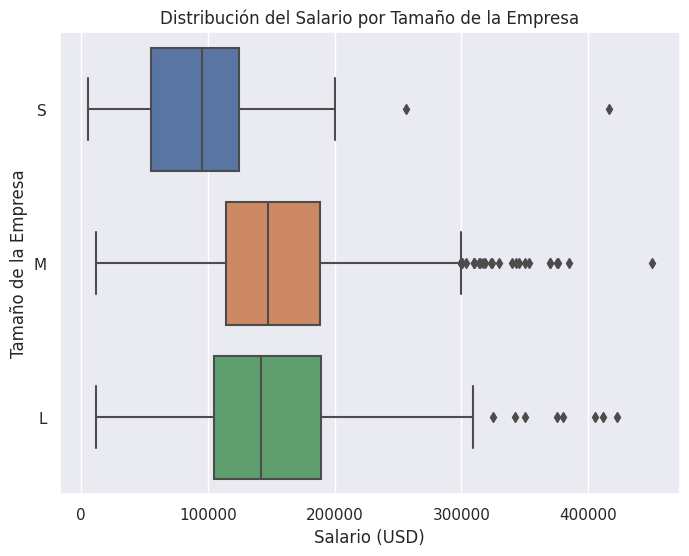

In [22]:
#@title Generamos un boxplot para ver los rangos de salario segun el tamaño de la empresa
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='company_size', x='salary_in_usd', orient='h')
plt.xlabel('Salario (USD)')
plt.ylabel('Tamaño de la Empresa')
plt.title('Distribución del Salario por Tamaño de la Empresa')
plt.show()

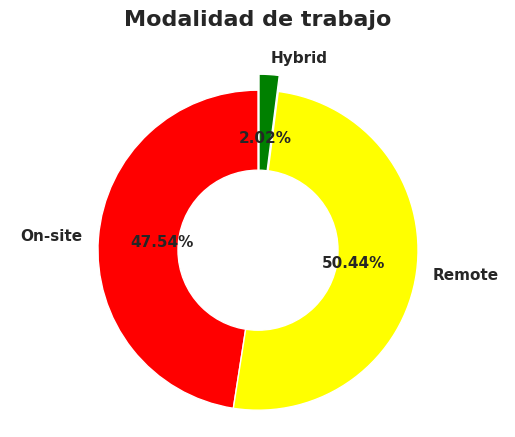

In [23]:
#@title Revisamos que tipo de modalidades predominan
remote_ratios = df['remote_ratio'].unique()
ratios_percentages = []
for ratio in remote_ratios:
    subset = df[df['remote_ratio'] == ratio]
    ratio_percentage = len(subset) / len(df) * 100
    ratios_percentages.append(ratio_percentage)
min_salary = df['salary_in_usd'].min()
mean_salary = df['salary_in_usd'].mean()
max_salary = df['salary_in_usd'].max()
colors = ['red', 'yellow', 'green']
labels = ['Min', 'Mean', 'Max']
explode = [0, 0, 0.1]
plt.pie(ratios_percentages, labels=remote_ratios, autopct='%1.2f%%',
        startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'},
        colors=colors, explode=explode)
circle = plt.Circle((0, 0), 0.5, color='white')
plt.gca().add_artist(circle)
plt.title('Modalidad de trabajo\n', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

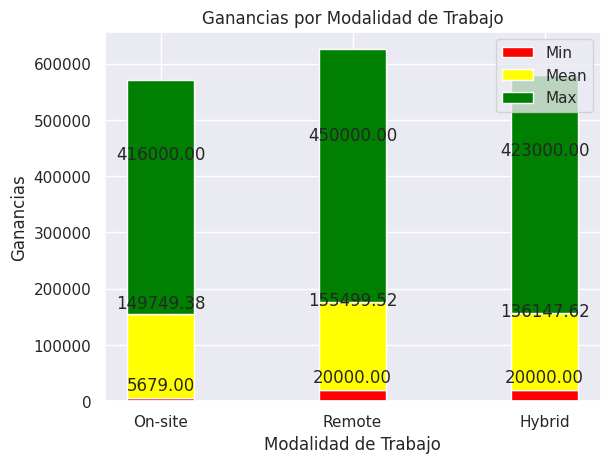

In [24]:
#@title Verificamos los salarios Min, Mean, Max para cada modalidad
modalidades_trabajo = df['remote_ratio'].unique()
ganancias_min = []
ganancias_mean = []
ganancias_max = []

for modalidad in modalidades_trabajo:
    subset = df[df['remote_ratio'] == modalidad]
    ganancias_min.append(subset['salary_in_usd'].min())
    ganancias_mean.append(subset['salary_in_usd'].mean())
    ganancias_max.append(subset['salary_in_usd'].max())

labels = list(modalidades_trabajo)
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

bar1 = ax.bar(x, ganancias_min, width, label='Min', color='red')
bar2 = ax.bar(x, ganancias_mean, width, label='Mean', color='yellow', bottom=ganancias_min)
bar3 = ax.bar(x, ganancias_max, width, label='Max', color='green', bottom=np.add(ganancias_min, ganancias_mean))

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Modalidad de Trabajo')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias por Modalidad de Trabajo')
ax.legend()

plt.show()

# Vamos a verificar relaciones

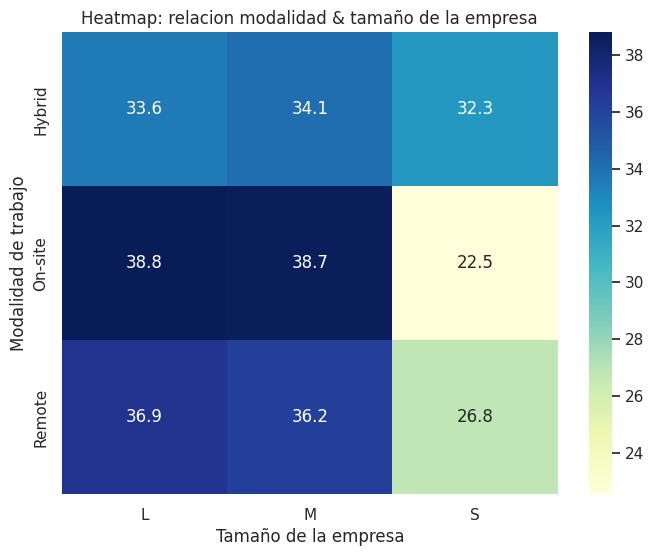

In [25]:
#@title con un mapa de calor verificamos la relacion entre el tamaño de la empresa y la modalidad de trabajo que adoptan

grouped_df = df.groupby(['remote_ratio', 'company_size'])

salary_median = grouped_df['salary_in_usd'].median()

salary_median_df = salary_median.unstack()
row_totals = salary_median_df.sum(axis=1)
percentage_data = (salary_median_df.T / row_totals).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(percentage_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap: relacion modalidad & tamaño de la empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Modalidad de trabajo')
plt.show()

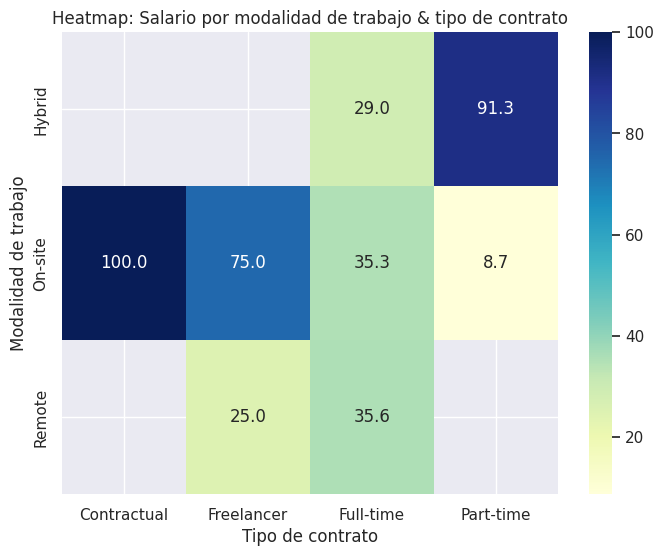

In [26]:
#@title con un mapa de calor verificamos la relacion entre el tipo de contrato que se adopta segun la modalidad de trabajo

grouped_df = df.groupby(['remote_ratio', 'employment_type'])

salary_median = grouped_df['salary_in_usd'].median()

salary_median_df = salary_median.unstack()
column_totals = salary_median_df.sum(axis=0)
percentage_data = (salary_median_df / column_totals) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(percentage_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap: Salario por modalidad de trabajo & tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Modalidad de trabajo')
plt.show()

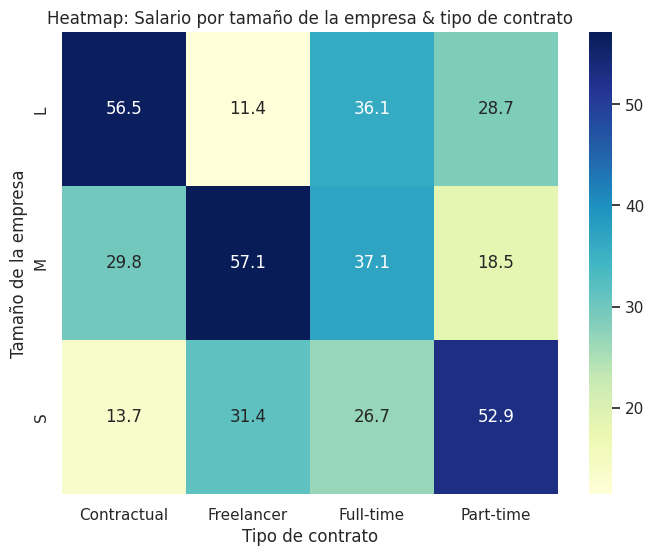

In [27]:
#@title con un mapa de calor verificamos la relacion entre el tamaño de la empresa y el tipo de contrato que eliguen

grouped_df = df.groupby(['company_size', 'employment_type'])

salary_median = grouped_df['salary_in_usd'].median()

salary_median_df = salary_median.unstack()
column_totals = salary_median_df.sum(axis=0)
percentage_data = (salary_median_df / column_totals) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(percentage_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap: Salario por tamaño de la empresa & tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Tamaño de la empresa')
plt.show()

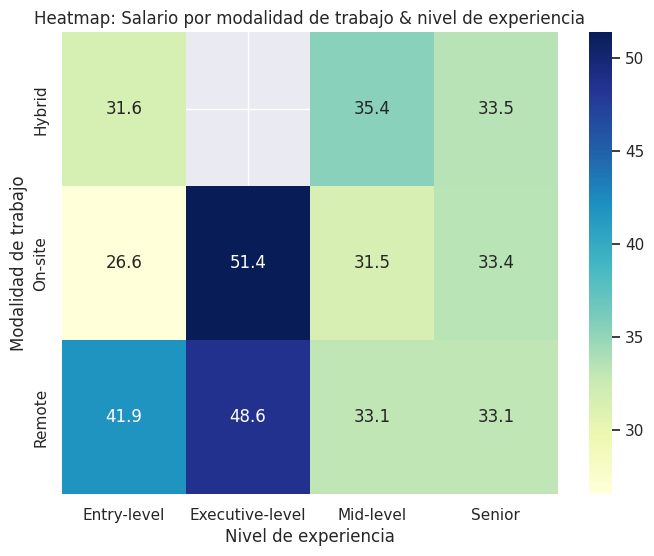

In [28]:
#@title con un mapa de calor verificamos la relacion entre el nivel de experiencia y la modalidad de trabajo
grouped_df = df.groupby(['remote_ratio', 'experience_level'])

salary_median = grouped_df['salary_in_usd'].median()

salary_median_df = salary_median.unstack()
column_totals = salary_median_df.sum(axis=0)
percentage_data = (salary_median_df / column_totals) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(percentage_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Heatmap: Salario por modalidad de trabajo & nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Modalidad de trabajo')
plt.show()